In [1]:
import sys
import os

# Ajouter le chemin du répertoire parent de cifar10_classification
project_path = os.path.abspath('..')
if project_path not in sys.path:
    sys.path.append(project_path)
print(project_path)

/home/mkbrad7/afs_epita/ING2/ML_reconnaissance_de_forme/Projet/classifiaction_cifar


In [2]:
# Importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from cifar10_classification.dataset import prepare_data
from cifar10_classification.features import extract_hog_features, flatten_images
from cifar10_classification.modeling.train import train_classifier
from cifar10_classification.plots import plot_sample_images, plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [3]:

# Vérifiez si le chemin est bien ajouté
print(sys.path)

['/home/mkbrad7/afs_epita/ING2/ML_reconnaissance_de_forme/Projet/classifiaction_cifar/notebooks', '/home/mkbrad7/anaconda3/lib/python311.zip', '/home/mkbrad7/anaconda3/lib/python3.11', '/home/mkbrad7/anaconda3/lib/python3.11/lib-dynload', '', '/home/mkbrad7/anaconda3/lib/python3.11/site-packages', '/home/mkbrad7/afs_epita/ING2/ML_reconnaissance_de_forme/Projet/classifiaction_cifar']


In [4]:
from cifar10_classification.config import BASE_DIR, DATA_DIR
print(BASE_DIR)
print(DATA_DIR)

/home/mkbrad7/afs_epita/ING2/ML_reconnaissance_de_forme/Projet/classifiaction_cifar
/home/mkbrad7/afs_epita/ING2/ML_reconnaissance_de_forme/Projet/classifiaction_cifar/cifar-10-batches-py


Nombre d'images d'entraînement: 50000
Nombre d'images de test: 10000
Taille d'une image: 32x32 pixels
Nombre de canaux par image: 3


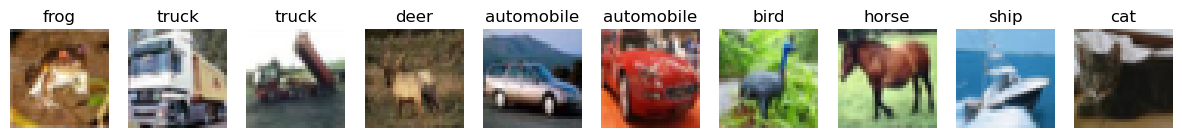

In [5]:
# Importer les bibliothèques nécessaires
from cifar10_classification.dataset import load_cifar10, unpickle
from cifar10_classification.config import DATA_DIR as data_dir, LABEL_NAMES
from cifar10_classification.plots import plot_sample_images, show_images
import os


# Charger les données
(X_train, y_train), (X_test, y_test) = load_cifar10(data_dir)

# Afficher les détails des données
print(f"Nombre d'images d'entraînement: {X_train.shape[0]}")
print(f"Nombre d'images de test: {X_test.shape[0]}")
print(f"Taille d'une image: {32}x{32} pixels")
print(f"Nombre de canaux par image: {3}")

# Afficher quelques images pour visualiser les données
label_names = unpickle(os.path.join(data_dir, 'batches.meta'))[b'label_names']
label_names = [label.decode('utf-8') for label in label_names]

plot_sample_images(X_train, y_train, label_names)
# save_images(X_train, y_train, label_names, 'sample_images.png')
# def save_images(images, labels, label_names, filename, n_images=100):
#     fig, axes = plt.subplots(10, 10, figsize=(10, 10))
#     for i, ax in enumerate(axes.flat):
#         ax.imshow(images[i])
#         ax.axis('off')
#         ax.set_title(label_names[labels[i][0]])
#     plt.tight_layout()
#     plt.savefig(filename)
#     plt.show()

In [18]:
# Préparer les données
X_train, y_train, X_val, y_val, X_test, y_test = prepare_data()

In [19]:
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")
    
print(f"Number of classes: {len(LABEL_NAMES)}")

Training data shape: (40000, 3072)
Validation data shape: (10000, 3072)
Test data shape: (10000, 3072)
Number of classes: 10


In [21]:
# Display class distribution
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print(f"Class distribution in training data: {class_distribution}")

Class distribution in training data: {0: 4027, 1: 4021, 2: 3970, 3: 3977, 4: 4067, 5: 3985, 6: 4004, 7: 4006, 8: 3983, 9: 3960}


In [7]:
# Extraire les caractéristiques HOG
X_train_hog = extract_hog_features(X_train)
X_val_hog = extract_hog_features(X_val)

# Aplatir les images
X_train_flat = flatten_images(X_train)
X_val_flat = flatten_images(X_val)

In [10]:
model_hog, val_hog_pred = train_classifier(X_train_hog, y_train, X_val_hog, y_val, model_type='logistic')


/home/mkbrad7/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
model_flat, val_flat_pred = train_classifier(X_train_flat, y_train, X_val_flat, y_val, model_type='logistic')

/home/mkbrad7/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion matrix, without normalization
[[563  38  77  17  41   8  20  20 160  29]
 [ 31 631  14  13  24   7  26  23  92 118]
 [116  24 367  63 115 126  98  58  38  25]
 [ 37  45  88 274 107 174 136  96  25  41]
 [ 39  41  61  61 407  44 113 101  21  45]
 [ 15  25  90 110  86 450  86 110  15  28]
 [ 26  42  48  44  82  54 643  30  16  11]
 [ 17  13  56  49 122  89  25 559  24  40]
 [151 111  36  13  15   5  17  19 562  88]
 [ 24 111  12  24  52  16  16  54  86 645]]


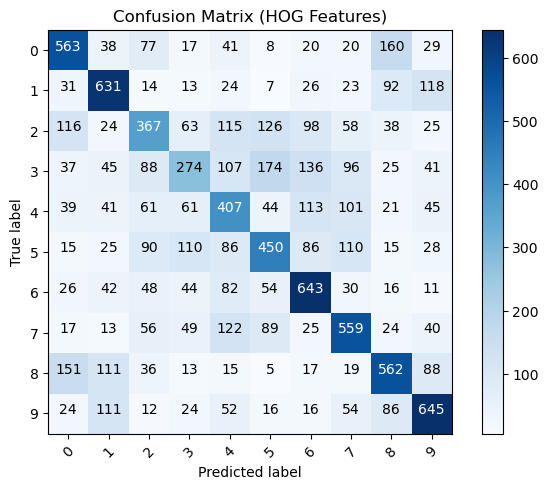

Confusion matrix, without normalization
[[469  68  38  39  22  29  21  56 156  75]
 [ 48 479  28  32  27  33  44  45  68 175]
 [ 97  43 293  91 116  93 132  90  39  36]
 [ 46  84  95 274  72 196 135  34  43  44]
 [ 68  28 117  68 308  66 130  86  36  26]
 [ 39  60 100 195  89 310  97  55  43  27]
 [ 16  35  74 137  90  70 483  41  19  31]
 [ 51  37  70  73 105  60  52 431  39  76]
 [164  80  27  36  13  39  12  18 542  86]
 [ 72 182  27  19  15  30  51  55  99 490]]


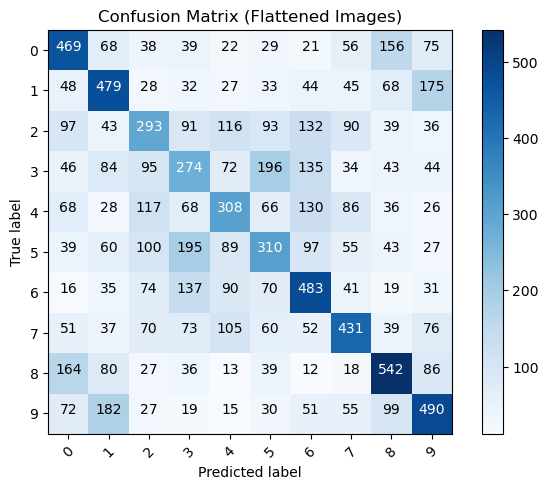

In [12]:
# Matrices de confusion
cm_hog = confusion_matrix(y_val, val_hog_pred)
cm_flat = confusion_matrix(y_val, val_flat_pred)

# Afficher les matrices de confusion
plot_confusion_matrix(cm_hog, classes=[str(i) for i in range(10)], title='Confusion Matrix (HOG Features)')
plot_confusion_matrix(cm_flat, classes=[str(i) for i in range(10)], title='Confusion Matrix (Flattened Images)')

In [15]:
# Sauvegarder les modèles
import joblib
joblib.dump(model_hog, '/home/mkbrad7/afs_epita/ING2/ML_reconnaissance_de_forme/Projet/classifiaction_cifar/models/logistic_hog_model.pkl')
joblib.dump(model_flat, '/home/mkbrad7/afs_epita/ING2/ML_reconnaissance_de_forme/Projet/classifiaction_cifar/models/logistic_flat_model.pkl')

['/home/mkbrad7/afs_epita/ING2/ML_reconnaissance_de_forme/Projet/classifiaction_cifar/models/logistic_flat_model.pkl']